In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e10\train.csv')
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
test = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e10\test.csv')
test.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [5]:
submission = pd.read_csv(r'C:\Users\omarf\Downloads\playground-series-s5e10\sample_submission.csv')
submission.head()

,id,accident_risk
0,517754,0.352
1,517755,0.352
2,517756,0.352
3,517757,0.352
4,517758,0.352


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [7]:
train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [8]:
train['weather'].unique()

array(['rainy', 'clear', 'foggy'], dtype=object)

In [9]:
train['road_type'].unique()

array(['urban', 'rural', 'highway'], dtype=object)

In [10]:
train['lighting'].unique()

array(['daylight', 'dim', 'night'], dtype=object)

In [11]:
train['time_of_day'].unique()

array(['afternoon', 'evening', 'morning'], dtype=object)

In [12]:
import pandas as pd

# Example: load your dataset
# train = pd.read_csv("train.csv")

# 1. Define categorical mappings
mappings = {
    "weather": {"rainy": 0, "clear": 1, "foggy": 2},
    "road_type": {"urban": 0, "rural": 1, "highway": 2},
    "lighting": {"daylight": 0, "dim": 1, "night": 2},
    "time_of_day": {"morning": 0, "afternoon": 1, "evening": 2}
}

# 2. Apply the categorical mappings
for col, mapping in mappings.items():
    if col in train.columns:
        train[col] = train[col].map(mapping)

# 3. Convert boolean columns to integers
bool_cols = ["road_signs_present", "public_road", "school_seasons", "num_reported_accidents"]

for col in bool_cols:
    if col in train.columns:
        train[col] = train[col].astype(int)   # True -> 1, False -> 0

# ✅ Now all categorical + boolean columns are numeric
print(train.head())


   id  road_type  num_lanes  curvature  speed_limit  lighting  weather  \
0   0          0          2       0.06           35         0        0   
1   1          0          4       0.99           35         0        1   
2   2          1          4       0.63           70         1        1   
3   3          2          4       0.07           35         1        0   
4   4          1          1       0.58           60         0        2   

   road_signs_present  public_road  time_of_day  holiday  school_season  \
0                   0            1            1    False           True   
1                   1            0            2     True           True   
2                   0            1            0     True          False   
3                   1            1            0    False          False   
4                   0            0            2     True          False   

   num_reported_accidents  accident_risk  
0                       1           0.13  
1                 

C:\Users\omarf\AppData\Local\Temp\ipykernel_14008\3316758411.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\omarf\AppData\Local\Temp\ipykernel_14008\3316758411.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omarf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


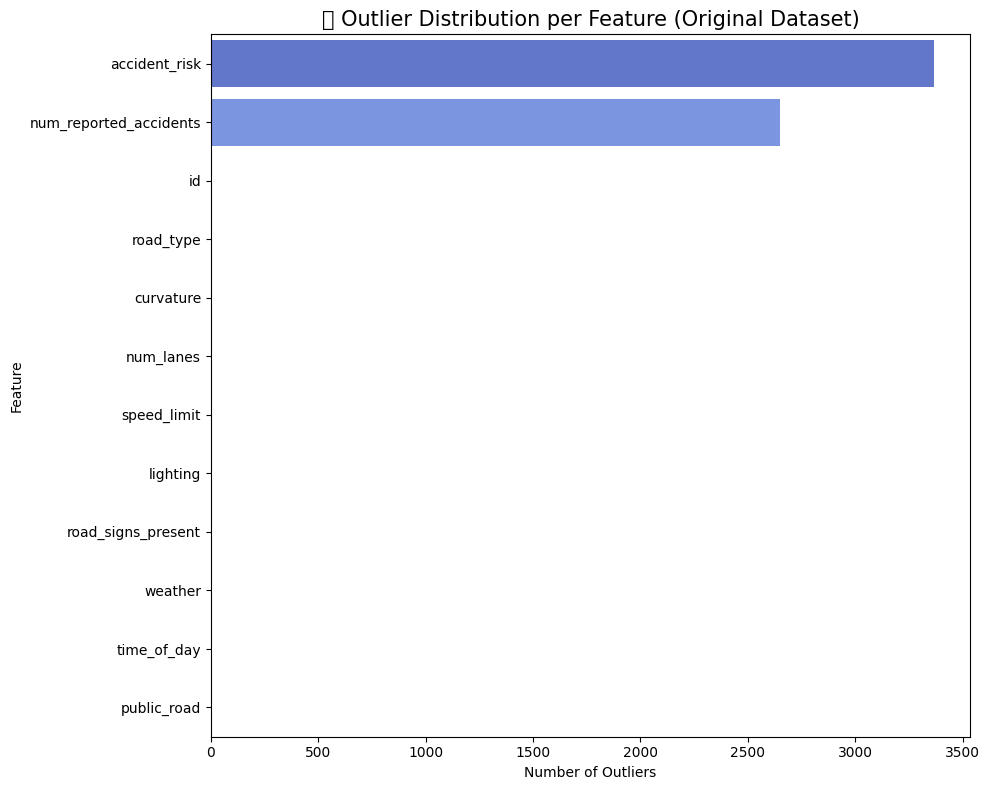

Top 10 features with most outliers:
                   Feature  Outlier Count
11           accident_risk           3367
10  num_reported_accidents           2649
0                       id              0
1                road_type              0
3                curvature              0
2                num_lanes              0
4              speed_limit              0
5                 lighting              0
7       road_signs_present              0
6                  weather              0


In [13]:
# ===============================
# Outlier Distribution Bar Plot
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Select numeric columns only ---
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# --- Detect outliers using IQR method ---
outlier_counts = {}
for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((train[col] < lower_bound) | (train[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

# --- Create a DataFrame for plotting ---
outlier_df = pd.DataFrame({
    'Feature': list(outlier_counts.keys()),
    'Outlier Count': list(outlier_counts.values())
}).sort_values(by='Outlier Count', ascending=False)

# --- Plot ---
plt.figure(figsize=(10, 8))
sns.barplot(
    data=outlier_df,
    y='Feature',
    x='Outlier Count',
    palette='coolwarm'
)
plt.title('📊 Outlier Distribution per Feature (Original Dataset)', fontsize=15)
plt.xlabel('Number of Outliers')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Optional: print top 10 outlier-heavy features ---
print("Top 10 features with most outliers:")
print(outlier_df.head(10))


In [14]:
# Handle outliers in 'num_reported_accidents' using IQR method
Q1 = train['num_reported_accidents'].quantile(0.25)
Q3 = train['num_reported_accidents'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers to the lower and upper bounds
train['num_reported_accidents'] = train['num_reported_accidents'].clip(lower=lower_bound, upper=upper_bound)

C:\Users\omarf\AppData\Local\Temp\ipykernel_14008\1963400949.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette='viridis')


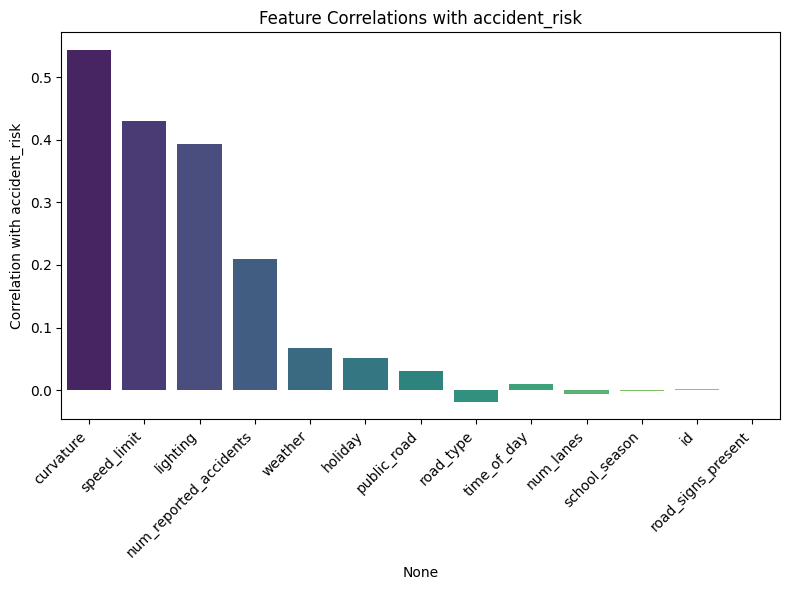

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate correlation of all features with 'accident_risk', excluding itself
corr = train.corr(numeric_only=True)['accident_risk'].drop('accident_risk').sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=corr.index, y=corr.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation with accident_risk')
plt.title('Feature Correlations with accident_risk')
plt.tight_layout()
plt.show()

In [16]:
# Calculate correlation matrix
corr_matrix = train.corr()

# Display correlation of all features with accident_risk, sorted by absolute value
acm_corr = corr_matrix['accident_risk'].drop('accident_risk').sort_values(key=abs, ascending=False)
print("Correlation of features with accident_risk:\n", acm_corr)

# Find the feature with the highest absolute correlation with accident_risk
most_impactful_feature = acm_corr.abs().idxmax()
print(f"\nFeature with highest impact on accident_risk: {most_impactful_feature} (correlation: {acm_corr[most_impactful_feature]:.4f})")

Correlation of features with accident_risk:
 curvature                 0.543946
speed_limit               0.430898
lighting                  0.393860
num_reported_accidents    0.209604
weather                   0.067948
holiday                   0.051129
public_road               0.031032
road_type                -0.018899
time_of_day               0.009259
num_lanes                -0.006003
school_season            -0.000977
id                        0.000969
road_signs_present        0.000629
Name: accident_risk, dtype: float64

Feature with highest impact on accident_risk: curvature (correlation: 0.5439)


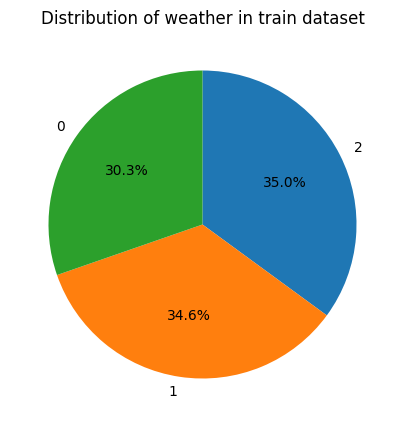

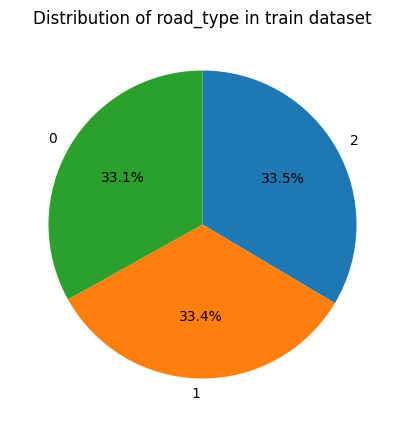

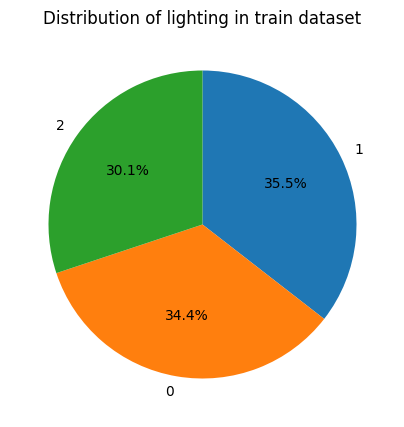

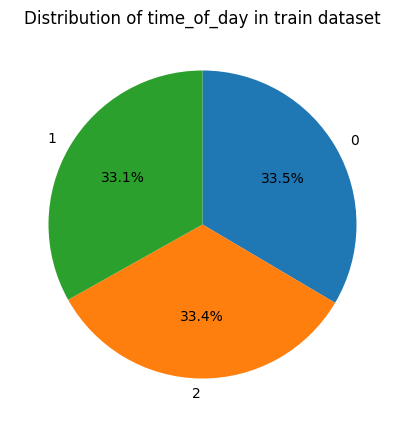

In [17]:
# Plot pie charts for categorical features in the train dataset
import matplotlib.pyplot as plt

categorical_features = ['weather', 'road_type', 'lighting', 'time_of_day']

for col in categorical_features:
    if col in train.columns:
        plt.figure(figsize=(5, 5))
        train[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
        plt.title(f'Distribution of {col} in train dataset')
        plt.ylabel('')
        plt.show()

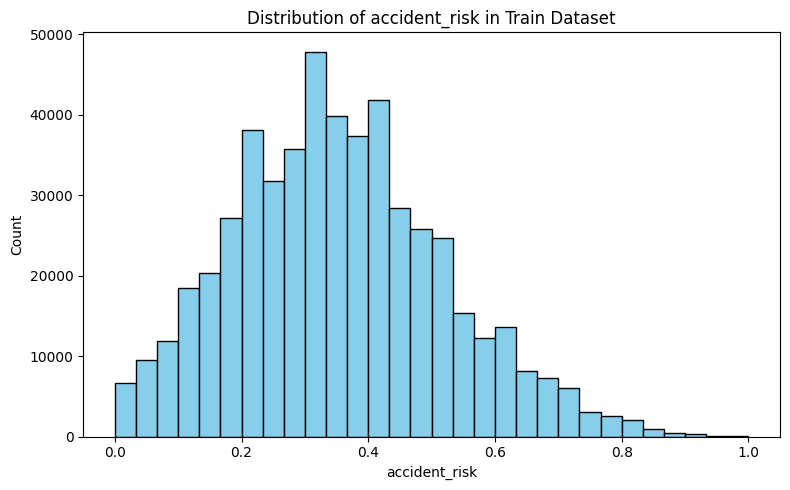

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(train['accident_risk'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('accident_risk')
plt.ylabel('Count')
plt.title('Distribution of accident_risk in Train Dataset')
plt.tight_layout()
plt.show()

In [22]:
# Feature engineering for tree-based ML algorithms (XGBoost, DecisionTreeRegressor, LGBMRegressor)

# 1. No need to scale or normalize features for tree-based models.
# 2. Use label encoding for categorical variables (already done).
# 3. Ensure boolean columns are integer (already done).
# 4. You may add interaction features or aggregate features if desired.

# Example: Prepare features for tree-based models
tree_features = [
    'weather', 'road_type', 'lighting', 'time_of_day',
    'road_signs_present', 'public_road', 'school_season', 'num_reported_accidents',
    'curvature', 'speed_limit', 'num_lanes', 'holiday'
]

# Prepare X and y for tree-based models
X_tree = train[tree_features]
y_tree = train['accident_risk']

print(X_tree.head())

   weather  road_type  lighting  time_of_day  road_signs_present  public_road  \
0        0          0         0            1                   0            1   
1        1          0         0            2                   1            0   
2        1          1         1            0                   0            1   
3        0          2         1            0                   1            1   
4        2          1         0            2                   0            0   

   school_season  num_reported_accidents  curvature  speed_limit  num_lanes  \
0           True                     1.0       0.06           35          2   
1           True                     0.0       0.99           35          4   
2          False                     2.0       0.63           70          4   
3          False                     1.0       0.07           35          4   
4          False                     1.0       0.58           60          1   

   holiday  
0    False  
1     True  

In [23]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import numpy as np

# Prepare data
X_stack = X_tree.copy()
y_stack = y_tree.copy()

# Initialize models
models = [
    ("lgbm", LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)),
    ("xgb", XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)),
    ("cat", CatBoostRegressor(random_state=42, verbose=0)),
    ("dt", DecisionTreeRegressor(random_state=42))
]

kf = KFold(n_splits=7, shuffle=True, random_state=42)
oof_preds = np.zeros((X_stack.shape[0], len(models)))
rmse_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_stack)):
    X_tr, X_val = X_stack.iloc[train_idx], X_stack.iloc[val_idx]
    y_tr, y_val = y_stack.iloc[train_idx], y_stack.iloc[val_idx]
    fold_rmse = []
    for i, (name, model) in enumerate(models):
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        oof_preds[val_idx, i] = preds
        rmse = mean_squared_error(y_val, preds, squared=False)
        fold_rmse.append(rmse)
    rmse_scores.append(fold_rmse)

# Stacking: simple linear regression on out-of-fold predictions
from sklearn.linear_model import LinearRegression

stack_rmse = []
stack_oof = np.zeros(X_stack.shape[0])

for fold, (train_idx, val_idx) in enumerate(kf.split(oof_preds)):
    stacker = LinearRegression()
    stacker.fit(oof_preds[train_idx], y_stack.iloc[train_idx])
    stack_preds = stacker.predict(oof_preds[val_idx])
    stack_oof[val_idx] = stack_preds
    stack_rmse.append(mean_squared_error(y_stack.iloc[val_idx], stack_preds, squared=False))

print("Base models RMSE (mean over folds):")
for i, (name, _) in enumerate(models):
    mean_rmse = np.mean([fold[i] for fold in rmse_scores])
    print(f"{name}: {mean_rmse:.5f}")

print(f"\nStacked model RMSE (mean over folds): {np.mean(stack_rmse):.5f}")

C:\Users\omarf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\omarf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\omarf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

Base models RMSE (mean over folds):
lgbm: 0.05627
xgb: 0.05621
cat: 0.05611
dt: 0.08307

Stacked model RMSE (mean over folds): 0.05609


In [25]:
import IPython

# 1. Apply categorical mappings to test set
for col, mapping in mappings.items():
    if col in test.columns:
        test[col] = test[col].map(mapping)

# 2. Convert boolean columns to integers in test set
for col in ['road_signs_present', 'public_road', 'school_season']:
    if col in test.columns:
        test[col] = test[col].astype(int)

# 3. Prepare test features (same as tree_features)
X_test = test[tree_features]

# 4. Use the stacking model from previous cell to predict accident_risk for test set
# Get base model predictions
test_preds = np.column_stack([
    model.fit(X_tree, y_tree).predict(X_test) if name != "cat" else model.fit(X_tree, y_tree).predict(X_test)
    for name, model in models
])

# Stacked prediction
final_preds = stacker.predict(test_preds)

# 5. Prepare submission file
submission['accident_risk'] = final_preds
submission.to_csv('submission.csv', index=False)

# 6. Provide a download link (for Jupyter)
IPython.display.display(IPython.display.FileLink('submission.csv'))

c:\Users\omarf\Downloads\submission.csv